In [119]:
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("bestsellers with categories.csv.xls")
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [121]:
df.shape

(550, 7)

In [122]:
names_count = df['Name'].nunique()
print(f"Датасет хранит данные о {names_count} книге.")

Датасет хранит данные о 351 книге.


In [123]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [146]:
#1. Первинне дослідження даних
df.isna().sum(axis=0)
print("Ответ: ", ["Пропусков нет.", "Пропуски есть"][int(_.all())])

Ответ:  Пропуски есть


/var/folders/_h/wyw9cn652zqf9l15y0dw01840000gn/T/ipykernel_82335/1040125350.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Ответ: ", ["Пропусков нет.", "Пропуски есть"][int(_.all())])


In [127]:
#Які є унікальні жанри?
df.genre.unique()
print("Ответ: ", df.genre.unique())

Ответ:  ['Non Fiction' 'Fiction']


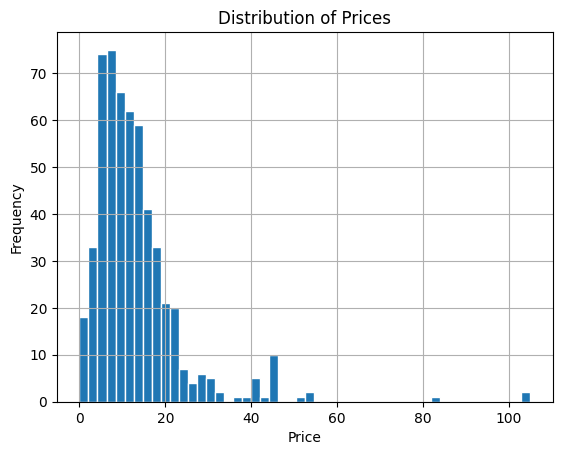

In [129]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
plot = df.price.plot(kind='hist', bins=50, edgecolor="white", grid=True)
plt.xlabel('Price')  
plt.ylabel('Frequency')  
plt.title('Distribution of Prices')  
plt.show()


In [130]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна
# (використовуйте функції max, min, mean, median)
print(f"Максимальная цена: {df.price.max()}")
print(f"Минимальная цена: {df.price.min()}")
print(f"Средняя цена: {df.price.mean()}")
print(f"Медианная цена: {df.price.median()}")



Максимальная цена: 105
Минимальная цена: 0
Средняя цена: 13.1
Медианная цена: 11.0


In [131]:
#2. Пошук та сортування даних
#Який рейтинг у датасеті найвищий?
print(f"Найбольший рейтинг в датасете {df.user_rating.max()}")

Найбольший рейтинг в датасете 4.9


In [132]:
#Скільки книг мають такий рейтинг?
df_size = df.name[(df.user_rating == df.user_rating.max())].unique().size
print(f"{df_size} книг имеют самый высокий рейтинг.")

28 книг имеют самый высокий рейтинг.


In [133]:
books_with_max_reviews = df[df['reviews'] == max_reviews][['name', 'year']]

for index, row in books_with_max_reviews.iterrows():
    print(f"Книга с наибольшим количеством отзывов: {row['name']} ({row['year']})")


Книга с наибольшим количеством отзывов: Where the Crawdads Sing (2019)


In [134]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча
# (можна використати проміжний датафрейм)?

df[df.year == 2015].sort_values(by="user_rating", ascending=False)\
.drop_duplicates(subset="name").iloc[:50].nlargest(1, "price")

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [135]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

result = df[(df.year == 2010) & (df.genre == "Fiction")]
print(f"Такого жанра было {result.shape[0]} книг.")

Такого жанра было 20 книг.


In [136]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

books_with_rating_4_9 = df[(df.user_rating == 4.9) & (df.year.isin([2010, 2011]))]

print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {books_with_rating_4_9.shape[0]}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


In [137]:
#Відсортуйде за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів.
df[(df.year == 2015) & (df.price < 8)].sort_values("price", ascending=True)


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [144]:
_.tail(1)

,mean
author,
Donna Tartt,3.9


In [153]:
#3. Агрегування даних та з'єднання таблиць

df.groupby('genre').agg(["min", "max"]).price

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [154]:
print("Max Price for Fiction: ", _.loc['Fiction']['max'])
print("Min Price for Fiction: ",  _.loc['Fiction']['min'])
print("Max Price for Non Fiction: ", _.loc['Non Fiction']['max'])
print("Min Price for Non Fiction: ",  _.loc['Non Fiction']['min'])

Max Price for Fiction:  82
Min Price for Fiction:  0
Max Price for Non Fiction:  105
Min Price for Non Fiction:  0


In [140]:
#Створіть датафрейм, який вміщатиме кількість книг для кожного з авторів

df_author_books_count = df.groupby("author").agg(['count']).name
df_author_books_count.sort_values('count')

,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11


In [141]:
#Якої розмірності вийшла таблиця?
print("Таблица получилась:")
print(f"Строк:{df_author_books_count.shape[0]}")
print(f"Столбцов:{df_author_books_count.shape[1]}")


Таблица получилась:
Строк:248
Столбцов:1


In [159]:
#Який автор має найбільше книг? Скільки книг цього автора? 
max_books_author = df_author_books_count.idxmax().values[0]
max_books_count = df_author_books_count.max().values[0]
print("Автор з найбільшою кількістю книг: ", max_books_author)
print("Кількість книг цього автора: ", max_books_count)


Автор з найбільшою кількістю книг:  Jeff Kinney
Кількість книг цього автора:  12


In [155]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 

df_author_rating_avg = df.groupby("author").user_rating.agg(['mean'])
df_author_rating_avg.sort_values('mean', ascending=False)

,mean
author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
...,...
Paula Hawkins,4.1
Muriel Barbery,4.0
Gillian Flynn,4.0


In [158]:
#У якого автора середній рейтинг мінімальний? Який у цього автора середній рейтинг?
min_avg_rating_author = df_author_rating_avg.idxmin().values[0]
min_avg_rating = df_author_rating_avg.min().values[0]
print("Автор з найменшим середнім рейтингом: ", min_avg_rating_author)
print("Середній рейтинг цього автора: ", min_avg_rating)

Автор з найменшим середнім рейтингом:  Donna Tartt
Середній рейтинг цього автора:  3.9


In [160]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно
#кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

df_authors = pd.concat([df_author_books_count, df_author_rating_avg], axis=1)\
    .rename(columns={"mean": "average_rating", "count": "books_count"})\
    .reset_index()
df_authors['average_rating'] = df_authors['average_rating'].round(2)
df_authors

,author,books_count,average_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


In [162]:
#Відсортуйте датафрейм за зростаючою кількістю книг
# та зростаючим рейтингом (використовуйте функцію sort_values)

df_authors.sort_values(by=["books_count", "average_rating"], ascending=False, inplace=True)
_.head(1)

,author,books_count,average_rating
120,Jeff Kinney,12,4.8


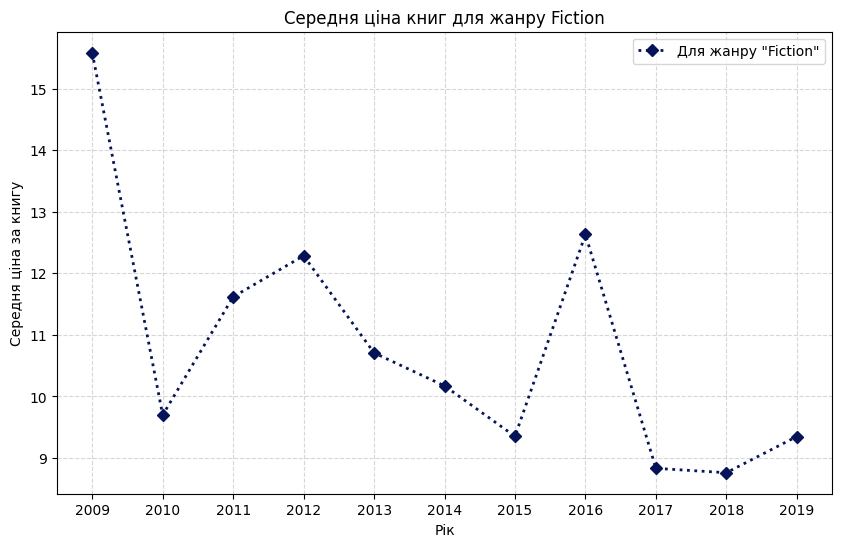

In [169]:
#График 1

# Средняя цена книг для жанра Fiction по годам
yearly_avg_price_genre = df[df['genre'] == 'Fiction'].groupby('year')['price'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price_genre.index, yearly_avg_price_genre.values,
         linestyle=":", color="#061358", linewidth=2, marker="D", label='Для жанру "Fiction"')

plt.title('Середня ціна книг для жанру Fiction')
plt.xlabel('Рік')
plt.ylabel('Середня ціна за книгу')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(yearly_avg_price_genre.index)
plt.legend()
plt.show()

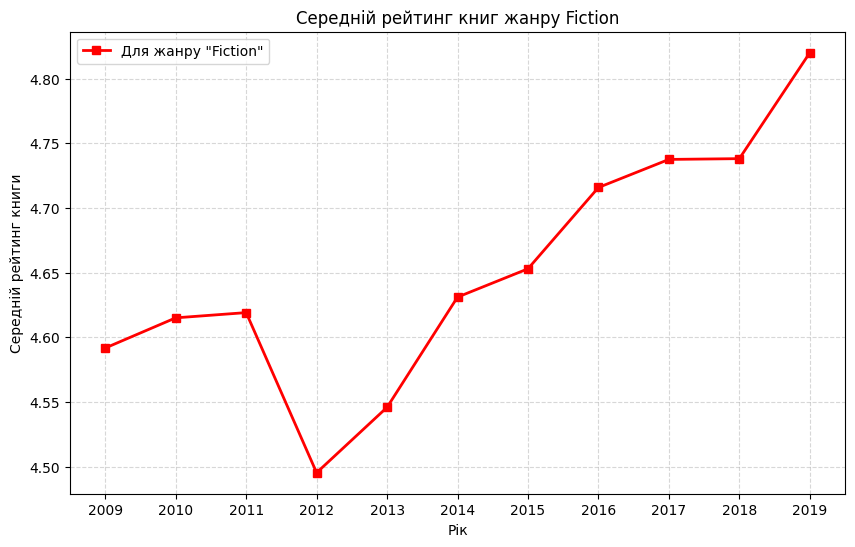

In [178]:
#График 2

yearly_avg_rating = df[df['genre'] == 'Fiction'].groupby('year')["user_rating"].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values,
         linestyle="solid", color="red", linewidth=2, marker="s", label='Для жанру "Fiction"')

plt.title('Середній рейтинг книг жанру Fiction')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг книги')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(yearly_avg_rating.index)
plt.legend()
plt.show()

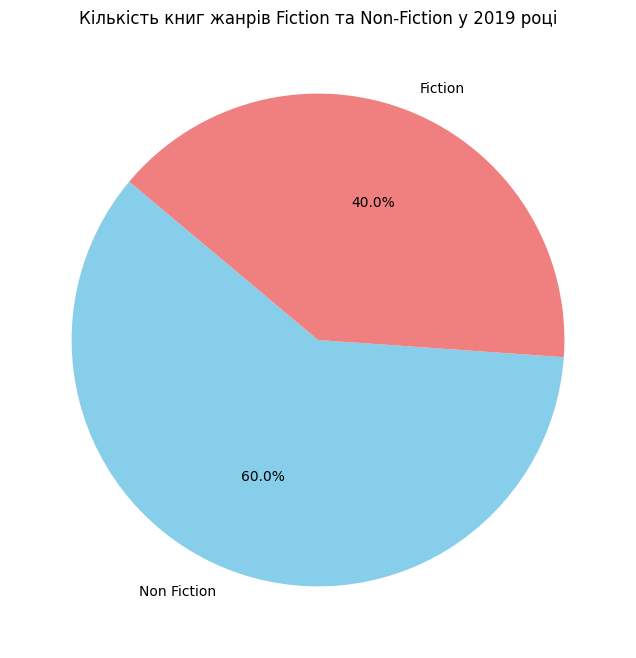

In [179]:
#График 3
books_2019 = df[df['year'] == 2019]


genre_counts = books_2019['genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Кількість книг жанрів Fiction та Non-Fiction у 2019 році')
plt.show()